# Image Classification on Fashion MNIST Dataset using Feedforward Neural Networks

Fashion-MNIST is a dataset of Zalando's article images. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

Data: [Github](https://github.com/zalandoresearch/fashion-mnist) or [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist)

The first step is to install import all the required libraries to perform the following task.

I am going to use Pytorch for implementing a feed-forward neural network

In [5]:
# Importing all the required libraries

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

## Data Preparation 

- Download the data
- Split the training dataset into training dataset and validation dataset
- Dividing the training, validation and test dataset into batches

In [6]:
train_data = FashionMNIST(root='data/', download=True, transform=ToTensor())
test_data = FashionMNIST(root='data/',train=False,transform=ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Let us check the size of the dataset:

In [7]:
print(f'Size of training dataset: {len(train_data)}')
print(f'Size of test dataset: {len(test_data)}')

Size of training dataset: 60000
Size of test dataset: 10000


Let us look the different output labels in the dataset

In [8]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Split the training dataset into training dataset and validation dataset.

In [9]:
training_data , val_data = random_split(train_data, [50000, 10000])

Verifying the size of the training dataset and validation dataset:

In [10]:
print(f'Size of training dataset: {len(training_data)}')
print(f'Size of validation dataset: {len(val_data)}')

Size of training dataset: 50000
Size of validation dataset: 10000


Dividing the training, validation and test dataset into batches

In [11]:
batch_size = 128

In [12]:
train_loader = DataLoader(train_data, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_data, batch_size, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_data, batch_size, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Let us look at a few images in the dataset:

The shape of the image: torch.Size([1, 28, 28])
The label of the image: T-shirt/top


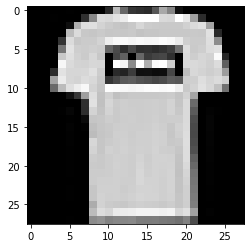

In [13]:
img, label = train_data[1]
print(f'The shape of the image: {img.shape}')
print(f'The label of the image: {train_data.classes[label]}')
plt.imshow(img[0], cmap='gray')

We can make use the `make_grid` function in PyTorch to view all the images of a batch:

Images in batch 1:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


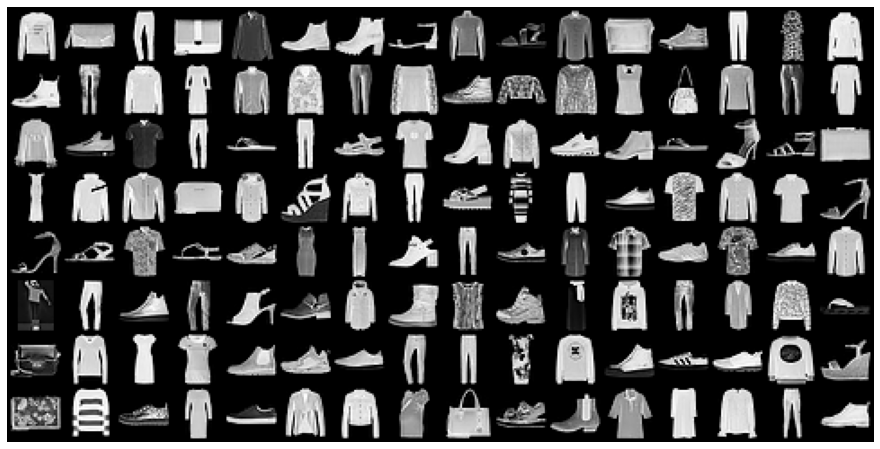

In [14]:
print(f'Images in batch 1:')

for img, label in train_loader:
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(img,nrow=16).permute((1, 2, 0)))
  break

## Model Building

After the data preparation phase, the next step is to build the model 

In [15]:
class FashionMNISTModel(nn.Module):
  """ Feed Forward neural network with 5 hidden layers"""
  def __init__(self,input_size, output_size):
    super().__init__()
    # Input Layer
    self.linear1 = nn.Linear(input_size,3200)
    # Hidden layer 1
    self.linear2 = nn.Linear(3200,1600)
    # Hidden Layer 2
    self.linear3 = nn.Linear(1600,800)
    # Hidden Layer 3
    self.linear4 = nn.Linear(800,256)
    # Hidden Layer 4
    self.linear5 = nn.Linear(256,64)
    # Hidden Layer 5
    self.linear6 = nn.Linear(64,32)
    # Output Layer
    self.linear7 = nn.Linear(32,output_size)
  
  def forward(self, input_batch):

    # Flatten the image tensors
    out = input_batch.view(input_batch.size(0),-1)
    # Get intermediate outputs using hidden layer
    out = self.linear1(out)
    # Apply ReLU activation function
    out = F.relu(out)
    # Get intermediate outputs using hidden layer
    out = self.linear2(out)
    # Apply ReLU activation function
    out = F.relu(out)
    # Get intermediate outputs using hidden layer
    out = self.linear3(out)
    # Apply ReLU activation function
    out = F.relu(out)
    # Get intermediate outputs using hidden layer
    out = self.linear4(out)
    # Apply ReLU activation function
    out = F.relu(out)
    # Get intermediate outputs using hidden layer
    out = self.linear5(out)
    # Apply ReLU activation function
    out = F.relu(out)
    # Get intermediate outputs using hidden layer
    out = self.linear6(out)
    # Apply ReLU activation function
    out = F.relu(out)
    # Get predictions using output layer
    out = self.linear7(out)
    return out
  
  def training_step(self, batch):
    imgs, labels = batch
    # 'self' calls the forward method
    out = self(imgs)
    # Find the loss (predicted vs actual) for training data
    loss = F.cross_entropy(out,labels)
    return loss
  
  def validation_step(self,batch):
    imgs, labels = batch
    # 'self' calls the forward method
    out = self(imgs)
    # Find the loss (predicted vs actual) for validation data
    loss = F.cross_entropy(out,labels)
    # Find the accuracy of predictions vs actual outputs 
    acc = accuracy(out,labels)
    return {'validation_loss': loss, 'validation_accuracy': acc}
  
  def validation_epoch_end(self, outputs):
    # Find the validation losses of batches and store in a list
    batch_losses = [x['validation_loss'] for x in outputs]
    # Find the mean of all the batch losses store in the list
    epoch_loss = torch.stack(batch_losses).mean()
    # Find the validation accuracies of batches and store in a list
    batch_accs = [x['validation_accuracy'] for x in outputs]
    # Find the mean of all the batch accuracies in the list
    epoch_accuracy = torch.stack(batch_accs).mean()
    return {'validation_loss': epoch_loss.item(), 'validation_accuracy': epoch_accuracy.item()}
  
  def epoch_end(self, epoch, result):
    print("Epoch [{}], validation_loss: {:.4f}, validation_accuracy: {:.4f}".format(epoch, result['validation_loss'], result['validation_accuracy']))


In [16]:
"""Define the accuracy method"""
def accuracy(outputs,labels):
  # Find the predict label with maximum probability in the output 
  _, preds = torch.max(outputs, dim=1)
  # Accuracy = No. of correct predicts / total length of predictions
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

## Using GPU

As the size of the dataset is large enough that it takes a bit of time to run on a CPU. We can leverage the use of GPU to train the model faster.

In [17]:
# Checking if a GPU is available to use
torch.cuda.is_available()

True

In [18]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [19]:
device = get_default_device()
device

device(type='cuda')

In [20]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [21]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [22]:
# Move the training, validation and test datasets to the GPU (if available)
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

## Training the Model

The final step of the process is train the model.

In [23]:
def evaluate(model, val_loader):
    # Evaluate the model on the validation data for each epoch
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    # Using a list to store the intermediate results
    history = []
    # Using the 'Stochastic Gradient Descent' Optimizer
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            # Find the loss on each batch of data
            loss = model.training_step(batch)
            # Backpropagation phase
            loss.backward()
            optimizer.step()
            # Set the gradients to 0 explicitly
            optimizer.zero_grad()
        # Validation phase (Evaluate the model on validation data)
        result = evaluate(model, val_loader)
        # Print the results for the current epoch (iteration)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [24]:
model = FashionMNISTModel(input_size=784, output_size=10)
to_device(model,device) #The model also needs to moved to the GPU(if available)

FashionMNISTModel(
  (linear1): Linear(in_features=784, out_features=3200, bias=True)
  (linear2): Linear(in_features=3200, out_features=1600, bias=True)
  (linear3): Linear(in_features=1600, out_features=800, bias=True)
  (linear4): Linear(in_features=800, out_features=256, bias=True)
  (linear5): Linear(in_features=256, out_features=64, bias=True)
  (linear6): Linear(in_features=64, out_features=32, bias=True)
  (linear7): Linear(in_features=32, out_features=10, bias=True)
)

### Start training the model

In [25]:
history = [evaluate(model, val_loader)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'validation_accuracy': 0.10116693377494812,
  'validation_loss': 2.308379888534546}]

In [26]:
history += fit(5, 0.4, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], validation_loss: 0.6557, validation_accuracy: 0.7513
Epoch [1], validation_loss: 0.4691, validation_accuracy: 0.8352
Epoch [2], validation_loss: 0.4125, validation_accuracy: 0.8381
Epoch [3], validation_loss: 0.3724, validation_accuracy: 0.8569
Epoch [4], validation_loss: 0.4221, validation_accuracy: 0.8501


In [27]:
history += fit(10, 0.1, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], validation_loss: 0.2543, validation_accuracy: 0.9054
Epoch [1], validation_loss: 0.2491, validation_accuracy: 0.9065
Epoch [2], validation_loss: 0.2332, validation_accuracy: 0.9127
Epoch [3], validation_loss: 0.2287, validation_accuracy: 0.9132
Epoch [4], validation_loss: 0.2154, validation_accuracy: 0.9206
Epoch [5], validation_loss: 0.2026, validation_accuracy: 0.9254
Epoch [6], validation_loss: 0.2064, validation_accuracy: 0.9215
Epoch [7], validation_loss: 0.1919, validation_accuracy: 0.9292
Epoch [8], validation_loss: 0.1910, validation_accuracy: 0.9276
Epoch [9], validation_loss: 0.1961, validation_accuracy: 0.9252


In [28]:
history += fit(10, 0.01, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], validation_loss: 0.1424, validation_accuracy: 0.9493
Epoch [1], validation_loss: 0.1373, validation_accuracy: 0.9518
Epoch [2], validation_loss: 0.1330, validation_accuracy: 0.9540
Epoch [3], validation_loss: 0.1277, validation_accuracy: 0.9562
Epoch [4], validation_loss: 0.1243, validation_accuracy: 0.9579
Epoch [5], validation_loss: 0.1218, validation_accuracy: 0.9579
Epoch [6], validation_loss: 0.1167, validation_accuracy: 0.9599
Epoch [7], validation_loss: 0.1211, validation_accuracy: 0.9567
Epoch [8], validation_loss: 0.1109, validation_accuracy: 0.9624
Epoch [9], validation_loss: 0.1107, validation_accuracy: 0.9622


In [29]:
history += fit(5, 0.01, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], validation_loss: 0.1053, validation_accuracy: 0.9648
Epoch [1], validation_loss: 0.1008, validation_accuracy: 0.9663
Epoch [2], validation_loss: 0.0976, validation_accuracy: 0.9678
Epoch [3], validation_loss: 0.0995, validation_accuracy: 0.9655
Epoch [4], validation_loss: 0.0936, validation_accuracy: 0.9691


In [30]:
history += fit(5, 0.01, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], validation_loss: 0.0882, validation_accuracy: 0.9715
Epoch [1], validation_loss: 0.0864, validation_accuracy: 0.9738
Epoch [2], validation_loss: 0.0870, validation_accuracy: 0.9705
Epoch [3], validation_loss: 0.0798, validation_accuracy: 0.9754
Epoch [4], validation_loss: 0.0797, validation_accuracy: 0.9739


In [31]:
history += fit(5, 0.01, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], validation_loss: 0.0742, validation_accuracy: 0.9765
Epoch [1], validation_loss: 0.0739, validation_accuracy: 0.9759
Epoch [2], validation_loss: 0.0665, validation_accuracy: 0.9798
Epoch [3], validation_loss: 0.0671, validation_accuracy: 0.9785
Epoch [4], validation_loss: 0.0621, validation_accuracy: 0.9807


In [32]:
history += fit(5, 0.01, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], validation_loss: 0.0626, validation_accuracy: 0.9795
Epoch [1], validation_loss: 0.0551, validation_accuracy: 0.9836
Epoch [2], validation_loss: 0.0562, validation_accuracy: 0.9822
Epoch [3], validation_loss: 0.0652, validation_accuracy: 0.9759
Epoch [4], validation_loss: 0.0471, validation_accuracy: 0.9851


In [33]:
history += fit(5, 0.001, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], validation_loss: 0.0381, validation_accuracy: 0.9904
Epoch [1], validation_loss: 0.0368, validation_accuracy: 0.9913
Epoch [2], validation_loss: 0.0363, validation_accuracy: 0.9914
Epoch [3], validation_loss: 0.0355, validation_accuracy: 0.9915
Epoch [4], validation_loss: 0.0352, validation_accuracy: 0.9920


In [34]:
history += fit(5, 0.001, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], validation_loss: 0.0345, validation_accuracy: 0.9919
Epoch [1], validation_loss: 0.0344, validation_accuracy: 0.9922
Epoch [2], validation_loss: 0.0338, validation_accuracy: 0.9935
Epoch [3], validation_loss: 0.0344, validation_accuracy: 0.9917
Epoch [4], validation_loss: 0.0334, validation_accuracy: 0.9926


Plotting validation losses and validation accuracies vs No. of epochs

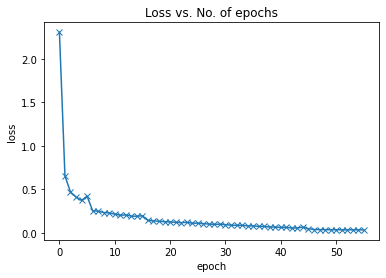

In [38]:
# Plotting Validation loss vs number of epochs
losses = [x['validation_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

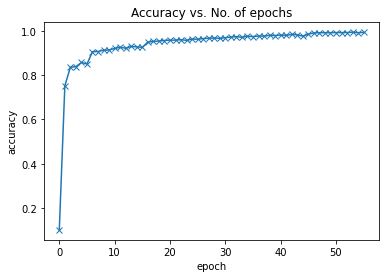

In [39]:
# Plotting validation accuracy vs No. of epochs
accuracies = [x['validation_accuracy'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

### Evaluating this model on the test dataset

In [40]:
evaluate(model,test_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'validation_accuracy': 0.9034810066223145,
 'validation_loss': 0.3768044412136078}

We can see that we have achieved an accuracy of 90.348% on test dataset whereas the accuracy on the validation data is 99.26%

### Prediction on Samples

Let us use some Sample data images from the dataset to predict the label using our built model and compare it with the actual label

In [42]:
def predict_label(img, model):
  # Convert the selected image into a batch using the 'unsqueeze' method
  input_b = to_device(img.unsqueeze(0), device)
  # Predict the output using the model
  predict_b = model(input_b)
  # Find the maximum probability among all the probabilities of labels
  _, preds = torch.max(predict_b, dim=1)
  return preds[0].item()

Label: Coat, Predicted: Coat


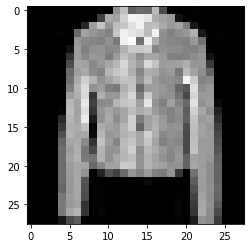

In [47]:
# Sample 1
img, label = test_data[10]
plt.imshow(img[0],cmap='gray')
print(f'Label: {train_data.classes[label]}, Predicted: {train_data.classes[predict_label(img,model)]}')

Label: Coat, Predicted: Pullover


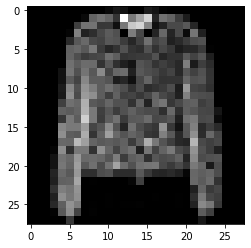

In [48]:
# Sample 2
img, label = test_data[51]
plt.imshow(img[0],cmap='gray')
print(f'Label: {train_data.classes[label]}, Predicted: {train_data.classes[predict_label(img,model)]}')

Label: Bag, Predicted: Bag


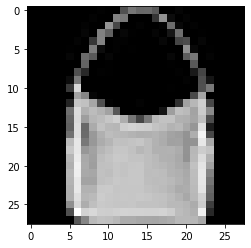

In [49]:
# Sample 3
img, label = test_data[34]
plt.imshow(img[0],cmap='gray')
print(f'Label: {train_data.classes[label]}, Predicted: {train_data.classes[predict_label(img,model)]}')

Label: Ankle boot, Predicted: Sandal


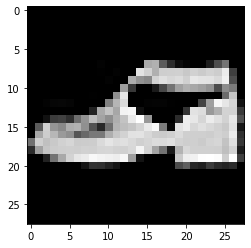

In [50]:
# Sample 4
img, label = test_data[23]
plt.imshow(img[0],cmap='gray')
print(f'Label: {train_data.classes[label]}, Predicted: {train_data.classes[predict_label(img,model)]}')

It can be observed that Sample 1 and Sample 2 are correctly predicted using the model we have built but Sample 3 and Sample 4 are incorrectly predicted as the model is not 100% accurate.

We can possibly train the model better to improve its accuracy on the test dataset

## Saving the model

- A common PyTorch convention is to save models using either a .pt or .pth file extension.

- `torch.save()` is a function which saves a serialized object to disk. This function uses Python’s pickle utility for serialization. Models, tensors, and dictionaries of all kinds of objects can be saved using this function.

In [51]:
torch.save(model.state_dict(), 'fashion-mnist.pth')